# Exercise 12 Solution: Multiple Comparison Problem Corrections
In this exercise, we examined essential statistical techniques for addressing the multiple comparisons problem in neuroscience research. When performing many statistical tests—such as across multiple EEG electrodes or experimental conditions—the probability of making a Type I error increases. This exercise explored three major correction methods that control the Family-Wise Error Rate (FWER), helping researchers avoid false discoveries when testing multiple hypotheses simultaneously.

Specifically, we covered:

1. **Bonferroni Correction:** We applied the Bonferroni correction, which controls FWER by dividing the desired alpha level (e.g., 0.05) by the number of comparisons. Though simple and rigorous, this method is known for being overly conservative, often failing to detect true effects, especially when the number of tests is large.

2. **Šidák Correction:** We then applied the Šidák correction, a less conservative alternative to Bonferroni that assumes independence between tests. It calculates an adjusted alpha using the formula $1-(1-\alpha)^{\frac{1}{m}}$. This method allows for slightly more statistical power while still controlling the FWER.

3. **Holm–Bonferroni Correction:** Finally, we explored the Holm–Bonferroni method, a stepwise approach that adjusts significance thresholds sequentially for ordered p-values. Holm’s method is uniformly more powerful than Bonferroni and does not assume test independence, making it highly practical in real-world EEG or fMRI research involving correlated measures.

4. **Comparing Methods:** Through simulated EEG data and multiple electrode comparisons, we observed how each method differs in conservativeness and sensitivity. Bonferroni often misses real effects; Šidák improves power under independence; Holm–Bonferroni balances robustness and power without requiring independence, making it well-suited for neuroscience applications.

5. **Interpreting Corrected p-values:** We implemented all three corrections in Python, interpreting the adjusted p-values to determine which comparisons remain statistically significant. Visualizations helped highlight how Holm’s adaptive thresholds allow detection of more meaningful results while controlling FWER.

By the end of this exercise, you will be equipped to apply Bonferroni, Šidák, and Holm–Bonferroni corrections to multi-electrode EEG data and beyond. You’ll also understand when and why to use each method, gaining critical insight into how to balance error control with statistical power in high-dimensional neuroscience studies.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests


## Family-Wise Error Rate (FWER) VS Bonferroni Correction

In [59]:
# Parameters
alpha = 0.05           # Significance level
m = 20                 # Number of tests per experiment
N = 10000              # Number of experiments

# Simulate N experiments, each with m test statistics from N(0, 1) under the null
z_scores = np.random.normal(loc=0, scale=1, size=(N, m))

# Compute two-tailed p-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # two-sided test



In [60]:
# --- Without Correction ---
type1_any = np.any(p_values < alpha, axis=1)
fwer_uncorrected = np.mean(type1_any)

# --- With Bonferroni Correction ---
alpha_bonf = alpha / m
type1_any_bonf = np.any(p_values < alpha_bonf, axis=1)
fwer_bonferroni = np.mean(type1_any_bonf)

# Output the results
print(f"FWER without correction (alpha={alpha}): {fwer_uncorrected:.4f}")
print(f"FWER with Bonferroni correction (alpha={alpha_bonf:.4f}): {fwer_bonferroni:.4f}")


FWER without correction (alpha=0.05): 0.6449
FWER with Bonferroni correction (alpha=0.0025): 0.0477


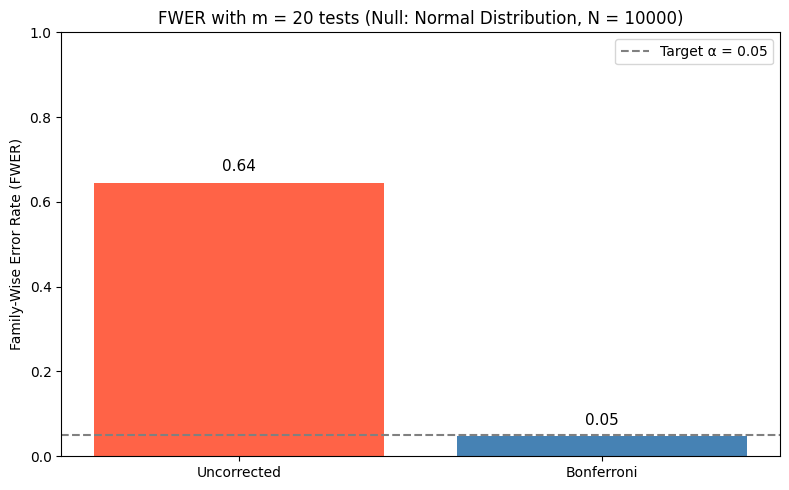

In [61]:
# --- Plot the results ---
labels = ['Uncorrected', 'Bonferroni']
fwer_values = [fwer_uncorrected, fwer_bonferroni]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, fwer_values, color=['tomato', 'steelblue'])
plt.axhline(y=alpha, color='gray', linestyle='--', label=f'Target α = {alpha}')
plt.ylim(0, 1)
plt.ylabel('Family-Wise Error Rate (FWER)')
plt.title(f'FWER with m = {m} tests (Null: Normal Distribution, N = {N})')
plt.legend()

# Annotate bar heights
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02,
             f"{height:.2f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

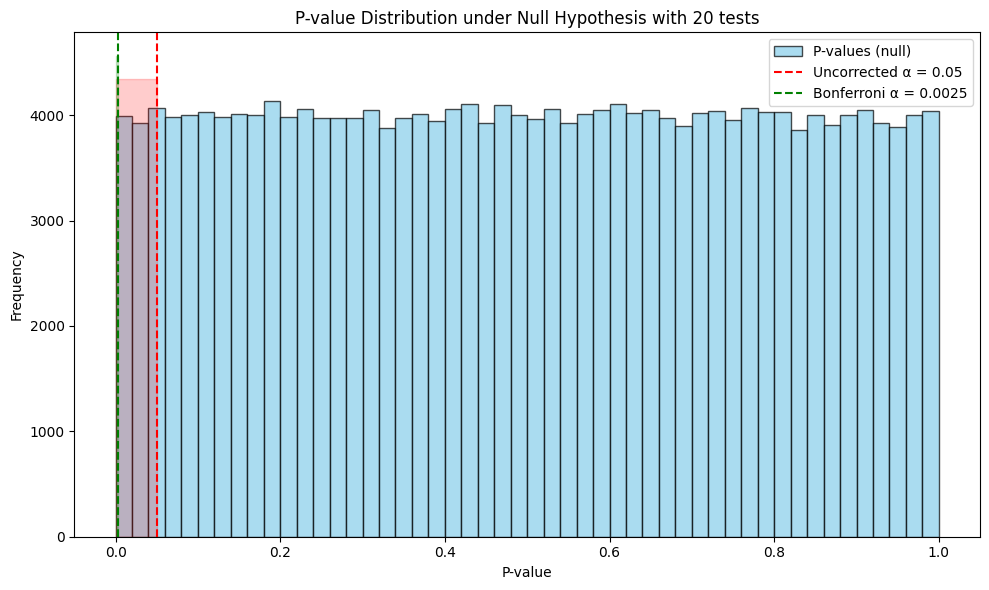

In [62]:
# Flatten p-values for plotting distributions
all_p_values = p_values.flatten()

# Plot p-value distribution and thresholds
plt.figure(figsize=(10, 6))

# Histogram of p-values
plt.hist(all_p_values, bins=50, color='skyblue', edgecolor='k', alpha=0.7, label='P-values (null)')

# Plot significance thresholds
plt.axvline(alpha, color='red', linestyle='--', label=f'Uncorrected α = {alpha}')
plt.axvline(alpha_bonf, color='green', linestyle='--', label=f'Bonferroni α = {alpha_bonf:.4f}')

# Highlight significant p-values under each criterion
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], 0, alpha, color='red', alpha=0.2)
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], 0, alpha_bonf, color='green', alpha=0.2)

plt.title(f"P-value Distribution under Null Hypothesis with {m} tests")
plt.xlabel("P-value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


The histogram of p-values generated under the null hypothesis (uniform-like but shaped here due to absolute Z in two-tailed test).
The shaded areas represent where p-values would be considered significant under each criterion.

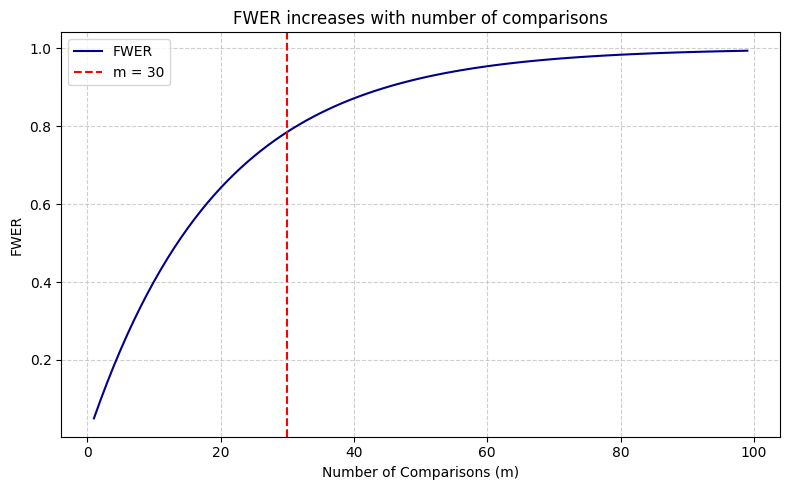

In [63]:
ms = np.arange(1, 100)
fwers = 1 - (1 - alpha)**ms

plt.figure(figsize=(8, 5))
plt.plot(ms, fwers, label='FWER', color='darkblue')
plt.axvline(30, color='red', linestyle='--', label='m = 30')
plt.title('FWER increases with number of comparisons')
plt.xlabel('Number of Comparisons (m)')
plt.ylabel('FWER')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

When performing multiple statistical tests, such as analyzing EEG P300 amplitude across many electrodes or time points, the chance of obtaining at least one false positive increases if no correction is applied.
Using a standard significance level (α = 0.05) for each test leads to a higher overall Family-Wise Error Rate (FWER) as the number of comparisons grows, increasing the likelihood of false positives.

## Exercise 2: Šidák Correction Correction

In [ ]:
# Dr. Nova's p-values from 8 electrodes
pvals = np.array([0.0041, 0.0049, 0.0062, 0.0096, 0.0381, 0.0455, 0.0519, 0.0496])
alpha = 0.05
m = len(pvals)

# 1. Bonferroni correction
reject_bonf, pvals_bonf, _, _ = multipletests(pvals, alpha=alpha, method='bonferroni')

# 2. Šidák correction
reject_sidak, pvals_sidak, _, _ = multipletests(pvals, alpha=alpha, method='sidak')

# Display results
print("Original p-values:           ", pvals)
print("Bonferroni corrected pvals:  ", np.round(pvals_bonf, 4), "→ Significant:", reject_bonf)
print("Šidák corrected p-values:    ", np.round(pvals_sidak, 4), "→ Significant:", reject_sidak)


In [ ]:
# Sort for visualization
sorted_indices = np.argsort(pvals)
sorted_pvals = pvals[sorted_indices]
tests = ['Fz', 'Cz', 'Pz', 'Oz', 'C3', 'C4', 'FC3', 'FC4']

# Corrections
bonf_thresh = alpha / m
sidak_thresh = 1 - (1 - alpha) ** (1 / m)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tests, sorted_pvals, marker='o', color='black', label='Sorted p-values')

# Plot Bonferroni and Šidák thresholds
plt.axhline(bonf_thresh, color='red', linestyle='--', label=f'Bonferroni threshold = {bonf_thresh:.4f}')
plt.axhline(sidak_thresh, color='green', linestyle='--', label=f'Šidák threshold = {sidak_thresh:.4f}')

# Mark significance
for i in range(m):
    if sorted_pvals[i] <= sidak_thresh and sorted_pvals[i] > bonf_thresh:
        plt.scatter(tests[i], sorted_pvals[i], color='blue', s=100, label='Significant (Šidák only)' if i == 0 else "")
    elif sorted_pvals[i] <= bonf_thresh:
        plt.scatter(tests[i], sorted_pvals[i], color='purple', s=100, label='Significant (Both)' if i == 0 else "")
    else:
        plt.scatter(tests[i], sorted_pvals[i], color='gray', s=100, label='Not significant' if i == 2 else "")

plt.title('Šidák vs. Bonferroni Correction for EEG P300 Tests')
plt.xlabel('Electrode (Ranked by p-value)')
plt.ylabel('p-value')
plt.ylim(0, 0.06)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Exercise 3: Holm-Bonferroni Correction

In [64]:
# Original p-values from 6 EEG electrodes
p_vals = np.array([0.002, 0.009, 0.023, 0.035, 0.042, 0.069])

# Apply Holm-Bonferroni correction
reject_holm, pvals_holm, _, _ = multipletests(p_vals, alpha=0.05, method='holm')
# Display results
print("Original p-values:", p_vals)
print("Corrected p-values (Holm):", np.round(pvals_holm, 4))
print("Significant after Holm-Bonferroni correction:", reject_holm)


Original p-values: [0.002 0.009 0.023 0.035 0.042 0.069]
Corrected p-values (Holm): [0.012 0.045 0.092 0.105 0.105 0.105]
Significant after Holm-Bonferroni correction: [ True  True False False False False]


In [66]:
reject_bonf, pvals_bonf, _, _ = multipletests(p_vals, alpha=0.05, method='bonferroni')
print("Original p-values:", p_vals)
print("Bonferroni corrected p-values:", np.round(pvals_bonf, 4))
print("Significant after Bonferroni correction:", rejected_bonf)


Original p-values: [0.002 0.009 0.023 0.035 0.042 0.069]
Bonferroni corrected p-values: [0.012 0.054 0.138 0.21  0.252 0.414]
Significant after Bonferroni correction: [ True False False False False False]


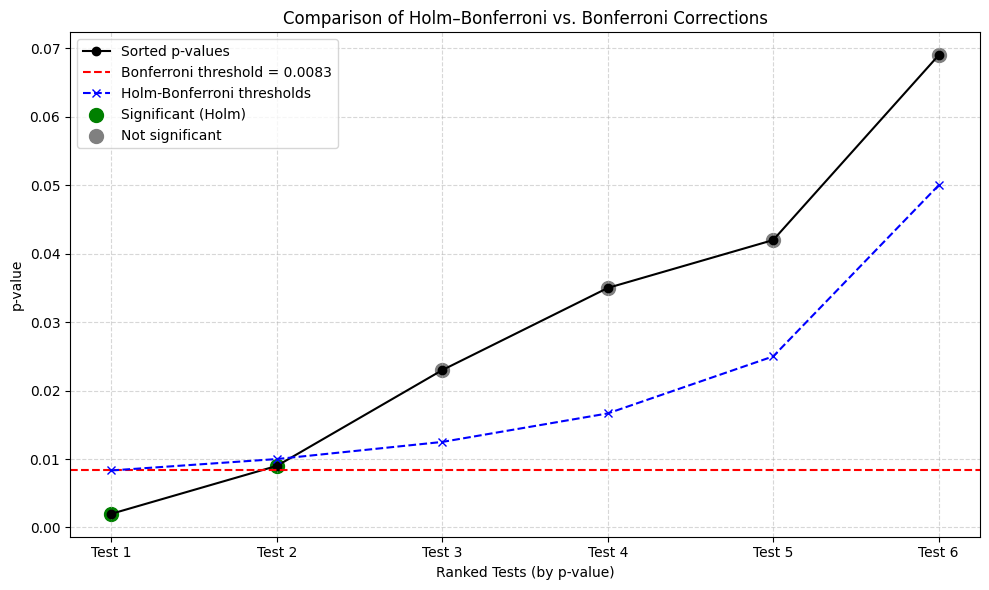

In [67]:
m = len(p_vals)
sorted_indices = np.argsort(p_vals)
sorted_pvals = p_vals[sorted_indices]
tests = [f"Test {i+1}" for i in sorted_indices]
bonf_thresh = alpha / m
holm_thresholds = [alpha / (m - i) for i in range(m)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tests, sorted_pvals, marker='o', color='black', label='Sorted p-values')
plt.axhline(bonf_thresh, color='red', linestyle='--', label=f'Bonferroni threshold = {bonf_thresh:.4f}')
plt.plot(tests, holm_thresholds, marker='x', linestyle='--', color='blue', label='Holm-Bonferroni thresholds')

# Mark significance under Holm
for i in range(m):
    if sorted_pvals[i] <= holm_thresholds[i]:
        plt.scatter(tests[i], sorted_pvals[i], color='green', s=100, label='Significant (Holm)' if i == 0 else "")
    else:
        plt.scatter(tests[i], sorted_pvals[i], color='gray', s=100, label='Not significant' if i == 2 else "")

plt.title('Comparison of Holm–Bonferroni vs. Bonferroni Corrections')
plt.xlabel('Ranked Tests (by p-value)')
plt.ylabel('p-value')
# plt.ylim(0, 0.06)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()